<a href="https://colab.research.google.com/github/thiagosouzadarosa/Portfolio/blob/main/Desafio_An%C3%A1lise_de_Dados_do_ENEM_e_IDH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Análise de Dados do ENEM e IDH**

**Imagine que você faz parte do time de ciência de dados de uma instituição filantrópica que atua com projetos voltados para melhoria da educação de ensino médio e do IDHM, dos municípios com nível baixo ou muito baixo.**



<img src="https://www.br.undp.org/content/dam/brazil/img/assets/IDH/undp-br-mapa-brasileiro-municipios-novo-1-2010.png" alt="drawing" width="500"/>

**Essa instituição seleciona anualmente 100 escolas em todo o país para receber USD 10 por aluno/mês, durante 12 meses, para as turmas do ensino médio.**
**Apesar da boa vontade, ainda não há clareza sobre os critérios de seleção.**
**Por esse motivo, você foi convidado a realizar uma análise exploratória de dados do ENEM (2017, 2018 e 2019) que possa direcionar a instituição na tomada de decisão.**

## **1. Qual o valor total a ser investido, considerando que cada escola possui apenas 1 turma com 30 alunos para cada série do ensino médio?**

**Neste bloco vamos importar bibliotecas necessárias para a realização da análise.**

In [ ]:
import pandas as pd
import os
import glob
import zipfile
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

Com base nas informações que temos, podemos obter o valor total a ser investido por meio da multiplicação de:

* Número de escolas.
* Número de série de ensino médio para cada escola.
* Número de alunos para cada série por escola.
* Valor que cada aluno receberá por mês.
* Período que será concedido o benefício.

In [ ]:
n_escolas = 100
series_ensino_medio = 3
n_alunos_serie = 30
USD_aluno_mes = 10
periodo_meses = 12

valor_total = n_escolas * series_ensino_medio * n_alunos_serie * USD_aluno_mes * periodo_meses

In [ ]:
print(f'Valor total a ser investido: USD {valor_total}')

Valor total a ser investido: USD 1080000


Como podemos observar, para que todas as condições forem satisfeitas a instituição deverá investir um total de **1.080.000,00 dólares**.

## **2. Quanto seria esse valor com a cotação do dólar de janeiro de 2019 e dezembro de 2020?**

Para obtermos esse valor em reais, vamos obter a cotação média do dólar para os meses indicados e fazer a conversão.

In [ ]:
dolar2019 = yf.download('USDBRL=X', start = '2019-01-01', end = '2019-01-31')
dolar2019.rename(columns = {'Adj Close':'Dolar'}, inplace = True)
dolar2019 = dolar2019.drop(dolar2019.columns[[0, 1, 2, 3, 5]], axis = 1)
media_dolar2019 = dolar2019['Dolar'].mean()

dolar2020 = yf.download('USDBRL=X', start = '2020-12-01', end = '2020-12-31')
dolar2020.rename(columns = {'Adj Close':'Dolar'}, inplace = True)
dolar2020 = dolar2020.drop(dolar2020.columns[[0, 1, 2, 3, 5]], axis = 1)
media_dolar2020 = dolar2020['Dolar'].mean()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
valor_reais2019 = round(valor_total * media_dolar2019, 2)
valor_reais2020 = round(valor_total * media_dolar2020, 2)

print(f'Valor total com dolar em Janeiro de 2019: R${valor_reais2019}')
print(f'Valor total com dolar em Dezembro de 2020: R${valor_reais2020}')

Valor total com dolar em Janeiro de 2019: R$4044290.08
Valor total com dolar em Dezembro de 2020: R$5566128.22


Dessa forma, se o valor fosse investido em Janeiro de 2019 resultaria em média num total de **4.044.290,08 reais**.

Caso o valor fosse investido em Dezembro de 2020 resultaria em média num total de **5.566.128,22 reais**.

## **3. Quais dados (arquivos) você utilizou, onde e como os coletou?**

Utilizou-se os arquivos de extensão .csv contendo os microdados do Enem dos anos de 2017, 2018 e 2019. Esses arquivos foram obtidos pelo site do Inep, disponível em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Utilizou-se também o arquivo de extensão .xlsx contendo os dados do Censo Demográfico dos anos de 1991, 2000 e 2010. Esse arquivo foi utilizado para obter as informações do ranking do IDHM diretamente da base de dados do Atlas Brasil. Está disponível em http://www.atlasbrasil.org.br/acervo/biblioteca

Arquivos contendo os microdados do censo de educação básica de 2019 também foram utilizados para obter os nomes das escolas. Encontra-se disponível em: http://download.inep.gov.br/microdados/microdados_educacao_basica_2019.zip

Foi realizado o download desses arquivos compactados para a máquina local, para então serem extraídos e manipulados.

In [ ]:
# mudar para o diretório contendo os dados baixados
os.chdir('Dados')

In [ ]:
# verificar se é o diretório correto
os.getcwd()

'/home/tsr/Desktop/DesafioDataScience/Dados'

In [ ]:
# verificar os arquivos contidos na pasta
os.listdir()

['microdados_educacao_basica_2019.zip',
 'censo_demografico.zip',
 '2019.zip',
 'df.parquet',
 '2018.zip',
 '2017.zip']

In [ ]:
# atribuir os arquivos compactados à uma variável
path = os.getcwd()
zipfiles = glob.glob(path + "/*.zip")

In [ ]:
zipfiles[2:5]

['/home/tsr/Desktop/DesafioDataScience/Dados/2019.zip',
 '/home/tsr/Desktop/DesafioDataScience/Dados/2018.zip',
 '/home/tsr/Desktop/DesafioDataScience/Dados/2017.zip']

In [ ]:
# separar os arquivos .zip que serão extraídos
enem_files = zipfiles[2:5]
censo_files = zipfiles[0:2]

In [ ]:
# visualizar dentro do arquivo .zip para definir qual arquivo será utilizado para a análise
with zipfile.ZipFile(enem_files[0]) as z:
    print(*z.namelist(), sep='\n')

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

In [ ]:
# criar uma função para extrair os arquivos para a análise
def extrair(arquivo):
    with zipfile.ZipFile(arquivo) as z:
        dados = z.open(f'DADOS/MICRODADOS_ENEM_{arquivo[-8:-4]}.csv')
        return dados
        

## **4. Que tipo de tratamento você aplicou na base de dados?**

Primeiramente, por se tratar de datasets extensos, optou-se por importar e trabalhar apenas com as colunas necessárias para a análise para um melhor gerenciamento de memória. As colunas importadas foram:

* **NU_INSCRICAO** : Número de inscrição do candidato
* **NO_MUNICIPIO_ESC** : Nome do município em que a escola do candidato se encontra
* **CO_ESCOLA** : Código da escola do candidato
* **NU_NOTA_CN** : Nota da prova de Ciências da Natureza obtida pelo candidato
* **NU_NOTA_CH** : Nota da prova de Ciências Humanas obtida pelo candidato
* **NU_NOTA_LC** : Nota da prova de Linguagens e Códigos obtida pelo candidato
* **NU_NOTA_MT** : Nota da prova de Matemática obtida pelo candidato
* **NU_NOTA_REDACAO** : Nota da prova de Redação obtida pelo candidato

Além disso, os dados vêm codificados no formato ISO-8859-1, sendo necessário informar ao interpretador para que a leitura seja feita corretamente.


In [ ]:
# extrair para variáveis

dataset2019 = extrair(enem_files[0])
dataset2018 = extrair(enem_files[1])
dataset2017 = extrair(enem_files[2])

In [ ]:
# criar um dataframe com os arquivos extraídos dos microdados do enem 
df2019 = pd.read_csv(dataset2019,
                     sep=';',
                     encoding='ISO-8859-1',
                     usecols=['NU_INSCRICAO',
                              'NO_MUNICIPIO_ESC',
                              'CO_ESCOLA',
                              'NU_NOTA_CN',
                              'NU_NOTA_CH',
                              'NU_NOTA_LC',
                              'NU_NOTA_MT',
                              'NU_NOTA_REDACAO'])

df2018 = pd.read_csv(dataset2018,
                     sep=';',
                     encoding='ISO-8859-1',
                     usecols=['NU_INSCRICAO',
                              'NO_MUNICIPIO_ESC',
                              'CO_ESCOLA',
                              'NU_NOTA_CN',
                              'NU_NOTA_CH',
                              'NU_NOTA_LC',
                              'NU_NOTA_MT',
                              'NU_NOTA_REDACAO'])

df2017 = pd.read_csv(dataset2017,
                     sep=';',
                     encoding='ISO-8859-1',
                     usecols=['NU_INSCRICAO',
                              'NO_MUNICIPIO_ESC',
                              'CO_ESCOLA',
                              'NU_NOTA_CN',
                              'NU_NOTA_CH',
                              'NU_NOTA_LC',
                              'NU_NOTA_MT',
                              'NU_NOTA_REDACAO'])

Criou-se uma coluna para cada dataframe para identificar a qual ano os dados percentem.

In [ ]:
# criar colunas para os anos
df2019['ANO'] = 2019
df2018['ANO'] = 2018
df2017['ANO'] = 2017

In [ ]:
# visualizar as 5 primeiras linhas dataframes
display(df2017.head(), df2018.head(), df2019.head())

,NU_INSCRICAO,CO_ESCOLA,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO
0,170003336736,NaN,NaN,445.4,589.0,621.5,465.5,560.0,2017
1,170003333545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
2,170001663644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
3,170001663645,NaN,NaN,604.0,610.4,563.9,591.2,580.0,2017
4,170001663646,NaN,NaN,482.1,569.2,570.8,584.6,580.0,2017


,NU_INSCRICAO,CO_ESCOLA,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO
0,180008202043,52033333.0,Goiânia,NaN,NaN,NaN,NaN,NaN,2018
1,180007197856,NaN,NaN,521.0,568.7,513.1,480.3,280.0,2018
2,180008517434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,180007661228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,180008787987,29112699.0,Jeremoabo,NaN,419.9,345.8,NaN,360.0,2018


,NU_INSCRICAO,CO_ESCOLA,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO
0,190001595656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,190001421546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,190001133210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,190001199383,NaN,NaN,483.8,503.6,537.3,392.0,460.0,2019
4,190001237802,NaN,NaN,513.6,575.5,570.7,677.0,860.0,2019


Os dataframes de cada ano foram concatenados, para que fosse possível trabalhar apenas com um único dataframe com todos os dados.

In [ ]:
# concatenar dataframes
df = pd.concat([df2017, df2018, df2019], axis=0)
del df2017, df2018, df2019


In [ ]:
df.head()

,NU_INSCRICAO,CO_ESCOLA,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO
0,170003336736,NaN,NaN,445.4,589.0,621.5,465.5,560.0,2017
1,170003333545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
2,170001663644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
3,170001663645,NaN,NaN,604.0,610.4,563.9,591.2,580.0,2017
4,170001663646,NaN,NaN,482.1,569.2,570.8,584.6,580.0,2017


Para melhor visualização as colunas foram renomeadas.

In [ ]:
# renomear colunas
df.rename(columns={'NU_INSCRICAO':'INSCRICAO',
                   'CO_ESCOLA':'ESCOLA',
                   'NO_MUNICIPIO_ESC': 'MUNICIPIO',
                   'NU_NOTA_CN':'CIEN_NAT',
                   'NU_NOTA_CH':'CIEN_HUM',
                   'NU_NOTA_LC':'LING_COD',
                   'NU_NOTA_MT':'MATEMATICA',
                   'NU_NOTA_REDACAO':'REDACAO'
                  }, inplace=True)

# visualizar colunas renomeadas
df.head()

,INSCRICAO,ESCOLA,MUNICIPIO,CIEN_NAT,CIEN_HUM,LING_COD,MATEMATICA,REDACAO,ANO
0,170003336736,NaN,NaN,445.4,589.0,621.5,465.5,560.0,2017
1,170003333545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
2,170001663644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
3,170001663645,NaN,NaN,604.0,610.4,563.9,591.2,580.0,2017
4,170001663646,NaN,NaN,482.1,569.2,570.8,584.6,580.0,2017


Criou-se uma coluna com a média da nota de todas as provas por candidato para posterior ranqueamento.

Os dados da coluna **MUNICIPIO** foram convertidas em caixa alta para posterior vinculação ao outro dataset.

In [ ]:
# criar coluna com a média das provas
df['MEDIA'] = df[['CIEN_NAT', 'CIEN_HUM', 'LING_COD', 'MATEMATICA', 'REDACAO']].mean(axis=1)

# converter dados para caixa alta
df['MUNICIPIO'] = df['MUNICIPIO'].str.upper()

# visualizar coluna criada
df.head()

,INSCRICAO,ESCOLA,MUNICIPIO,CIEN_NAT,CIEN_HUM,LING_COD,MATEMATICA,REDACAO,ANO,MEDIA
0,170003336736,NaN,NaN,445.4,589.0,621.5,465.5,560.0,2017,536.28
1,170003333545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
2,170001663644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
3,170001663645,NaN,NaN,604.0,610.4,563.9,591.2,580.0,2017,589.90
4,170001663646,NaN,NaN,482.1,569.2,570.8,584.6,580.0,2017,557.34


## **5. Qual a proporção de missing nas bases e o que você fará com esses casos? Na sua opinião, quais os mais relevantes?**

In [ ]:
# retornar missing values
round((df.isnull().sum() / df.shape[0]).sort_values(ascending = False), 4)

MUNICIPIO     0.7473
ESCOLA        0.7473
CIEN_NAT      0.3049
MATEMATICA    0.3049
REDACAO       0.2634
CIEN_HUM      0.2634
LING_COD      0.2634
MEDIA         0.2616
INSCRICAO     0.0000
ANO           0.0000
dtype: float64

Em escala percentual a proporção de valores faltantes foram:

* **MUNICIPIO**  =  74.73 % 
* **ESCOLA**     =  74.73 %
* **CIEN_NAT**   =  30.49 %
* **MATEMATICA** =  30.49 %
* **REDACAO**    =  26.34 %
* **CIEN_HUM**   =  26.34 %
* **LING_COD**   =  26.34 %
* **MEDIA**      =  26.16 %

Neste caso, como são dados faltantes difíceis de estimar com precisão, os valores são eliminados.

Como nesta análise são necessários os dados de escola e município para indicação de possíveis escolas em municípios com nível baixo ou muito baixo de IDHM, esses casos acabam sendo os mais relevantes. Sem essas informações é possível que algumas escolas com maior necessidade não entrem na seleção por não apresentarem dados.

## **6. Qual o número de inscritos por ano? Existe alguma tendência a ser observada nos dados?**

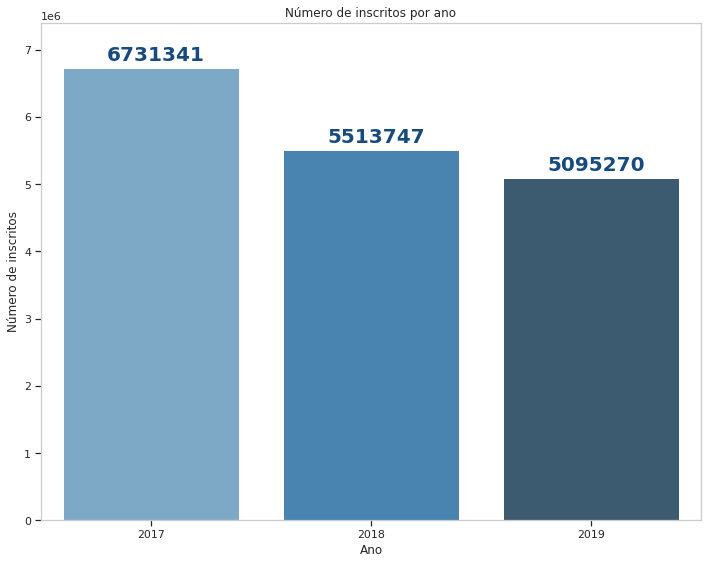

In [ ]:
# agrupar dados por número de inscritos por ano
insc_ano = df.groupby('ANO', as_index=False)['INSCRICAO'].count()

# definir tema e dimensão
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10, 8))

# remover grades
ax.grid(visible=False, axis='both')

# visualizar ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# definir limite do eixo x
# ax.set_xlim([0, max(df['room_type'].value_counts())-2000])
ax.set_ylim(0, 7400000)

# atribuir dados ao plot
sns.barplot(x="ANO", y="INSCRICAO", palette="Blues_d", data=insc_ano);

# # configurar labels
ax.set_title("Número de inscritos por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Número de inscritos")

ax.text(-0.20, insc_ano['INSCRICAO'][0]+100000, insc_ano['INSCRICAO'][0], fontweight='bold', fontsize=20, color='#174A7E')
ax.text(0.80, insc_ano['INSCRICAO'][1]+100000, insc_ano['INSCRICAO'][1], fontweight='bold', fontsize=20, color='#174A7E')
ax.text(1.8, insc_ano['INSCRICAO'][2]+100000, insc_ano['INSCRICAO'][2], fontweight='bold', fontsize=20, color='#174A7E')


fig.tight_layout()


Podemos observar no gráfico acima, a quantidade de inscritos por ano.

O maior número de inscritos foi no ano de 2017 com **6.731.341**, seguido do ano de 2018 com **5.513.747** e por último o ano de 2019 com **5.095.270**.

In [ ]:
ano17_18 = round(100 - ((insc_ano['INSCRICAO'][1] * 100)/ insc_ano['INSCRICAO'][0]), 2)
ano18_19 = round(100 - ((insc_ano['INSCRICAO'][2] * 100)/ insc_ano['INSCRICAO'][1]), 2)
ano17_19 = round(100 - ((insc_ano['INSCRICAO'][2] * 100)/ insc_ano['INSCRICAO'][0]), 2)

print(f'Decréscimo de 2017 para 2018 de: {ano17_18}%')
print(f'Decréscimo de 2018 para 2019 de: {ano18_19}%')
print(f'Decréscimo de 2017 para 2019 de: {ano17_19}%')

Decréscimo de 2017 para 2018 de: 18.09%
Decréscimo de 2018 para 2019 de: 7.59%
Decréscimo de 2017 para 2019 de: 24.31%


Podemos notar que o número de inscritos vem caindo ano após ano.

Sendo um decréscimo de de 2017 para 2018 de **18.09%**, de 2018 para 2019 de **7.59%** e um decréscimo total de 2017 para 2019 de **24.31%**.

**Após verificar o número de inscritos, agora podemos remover os valores faltantes do dataset.**

In [ ]:
# eliminar valores faltantes
df.dropna(inplace=True)

# verificar se foram eliminados
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

INSCRICAO     0.0
ESCOLA        0.0
MUNICIPIO     0.0
CIEN_NAT      0.0
CIEN_HUM      0.0
LING_COD      0.0
MATEMATICA    0.0
REDACAO       0.0
ANO           0.0
MEDIA         0.0
dtype: float64

Vamos aproveitar e alterar os formatos dos dados para melhor gerenciamento de memória.

## **7. Quais as notas médias por ano de realização da prova?**

In [ ]:
# criar função para plotar gráfico de barras com as médias
def nota_media(coluna, nome_materia):
    # agrupar dados por média de provas
    nota_agrup = round(df.groupby('ANO', as_index=False)[coluna].mean(), 2)

    # definir tema e dimensão
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize = (10, 8))

    # remover grades
    ax.grid(visible=False, axis='both')

    # visualizar ticks
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # definir limite do eixo x
    # ax.set_xlim([0, max(df['room_type'].value_counts())-2000])
    ax.set_ylim(0, 620)

    # atribuir dados ao plot
    sns.barplot(x="ANO", y=coluna, palette="Blues_d", data=nota_agrup);

    # # configurar labels
    ax.set_title(f"Nota média da prova {nome_materia} por ano")
    ax.set_xlabel("Ano")
    ax.set_ylabel("Nota Média")

    ax.text(-0.18, nota_agrup[coluna][0]+10, nota_agrup[coluna][0], fontweight='bold', fontsize=20, color='#174A7E')
    ax.text(0.85, nota_agrup[coluna][1]+10, nota_agrup[coluna][1], fontweight='bold', fontsize=20, color='#174A7E')
    ax.text(1.85, nota_agrup[coluna][2]+10, nota_agrup[coluna][2], fontweight='bold', fontsize=20, color='#174A7E')


    fig.tight_layout()

### **a. Nota da prova de Ciências da Natureza**

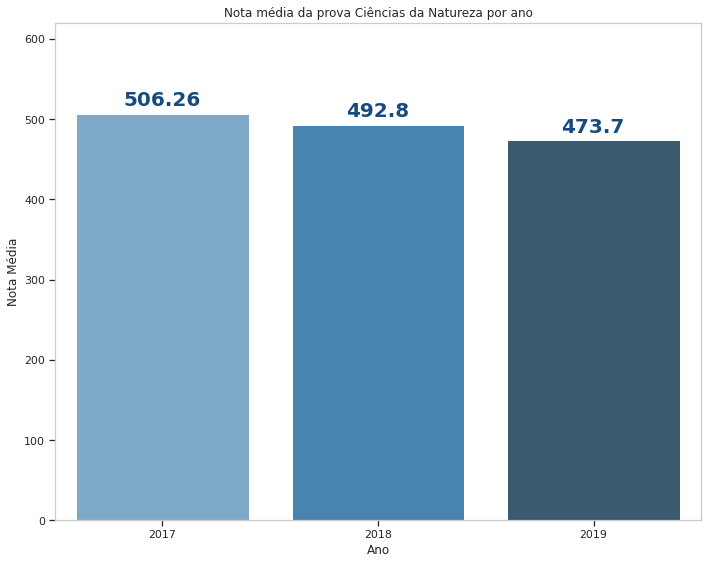

In [ ]:
nota_media('CIEN_NAT', 'Ciências da Natureza')

As notas médias da prova de Ciência da Natureza foram **506.26**, **492.80** e **473.70** para 2017, 2018 e 2019, respectivamente.

### **b. Nota da prova de Ciências Humanas**

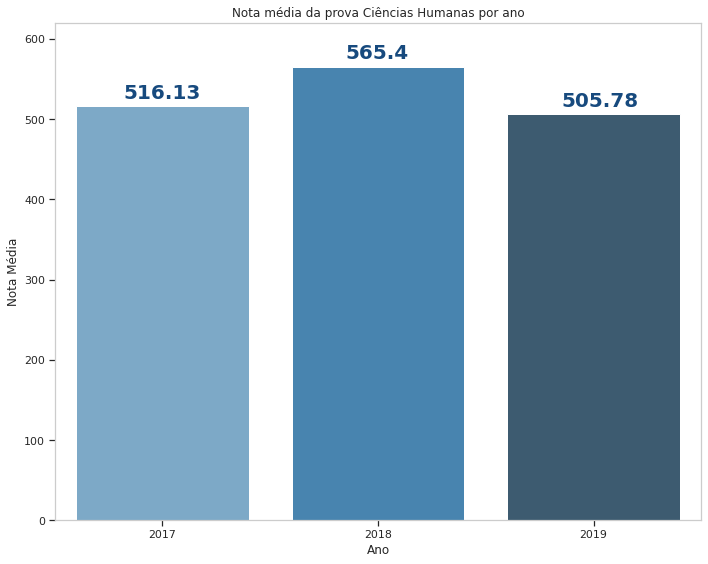

In [ ]:
nota_media('CIEN_HUM', 'Ciências Humanas')

As notas médias da prova de Ciência da Natureza foram **516.13**, **565.40** e **505.78** para 2017, 2018 e 2019, respectivamente.

### **c. Nota da prova de Linguagens e Códigos**

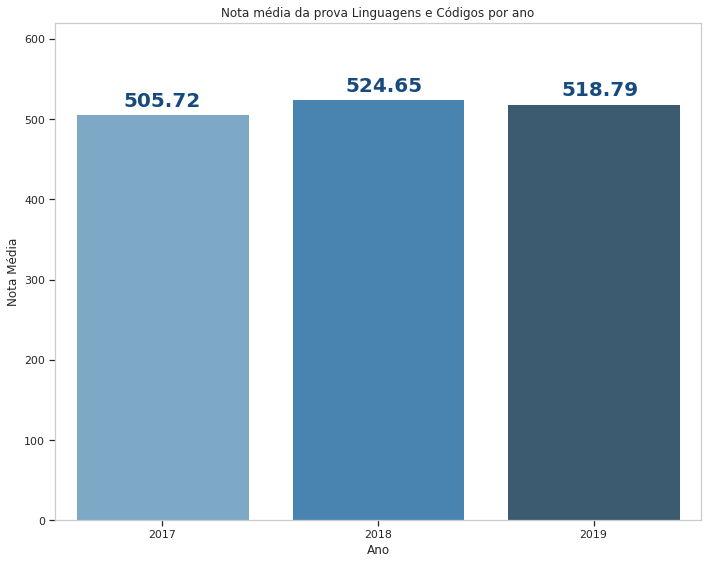

In [ ]:
nota_media('LING_COD', 'Linguagens e Códigos')

As notas médias da prova de Ciência da Natureza foram **505.72**, **524.65** e **518.79** para 2017, 2018 e 2019, respectivamente.

### **d. Nota da prova de Matemática**

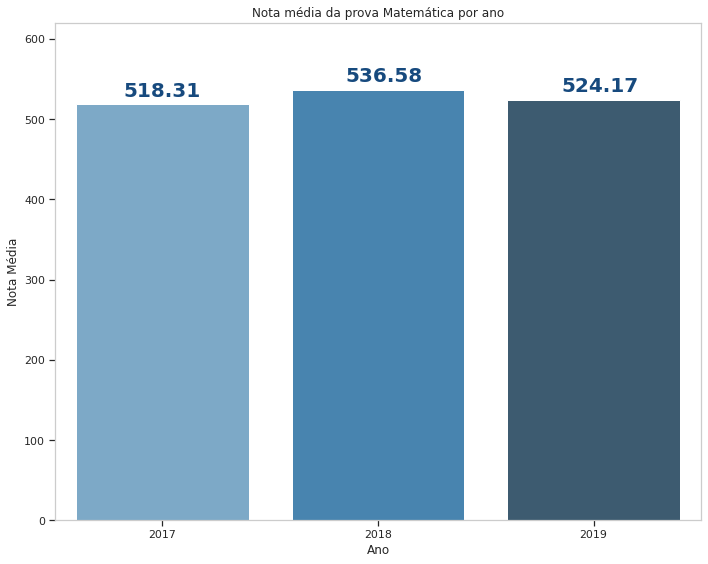

In [ ]:
nota_media('MATEMATICA', 'Matemática')

As notas médias da prova de Ciência da Natureza foram **518.31**, **536.58** e **524.17** para 2017, 2018 e 2019, respectivamente.

### **e. Redação**

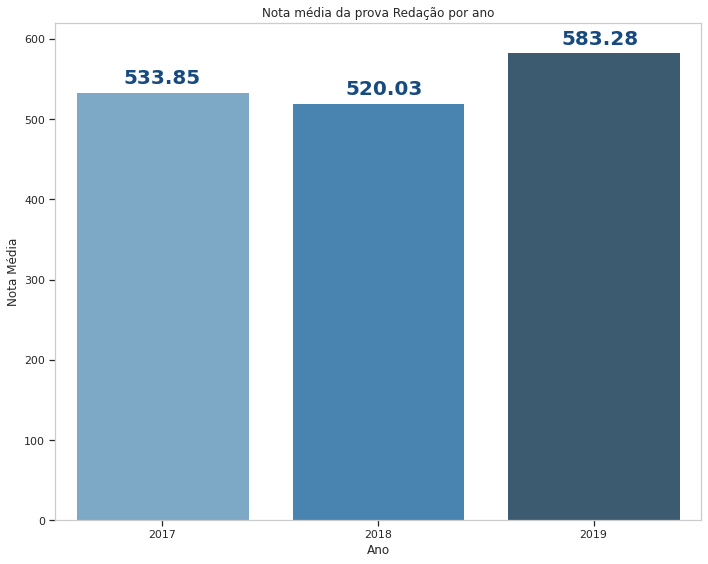

In [ ]:
nota_media('REDACAO', 'Redação')

As notas médias da prova de Ciência da Natureza foram **533.85**, **520.03** e **583.28** para 2017, 2018 e 2019, respectivamente.

### **f. Nota total (soma a+b+c+d+e)**

In [ ]:
materias = round(df.groupby('ANO', as_index=False)[['CIEN_NAT', 'CIEN_HUM', 'LING_COD', 'MATEMATICA', 'REDACAO']].mean(), 2)
materias['NOTA_TOTAL'] = materias[['CIEN_NAT', 'CIEN_HUM', 'LING_COD', 'MATEMATICA', 'REDACAO']].sum(axis=1)
materias

,ANO,CIEN_NAT,CIEN_HUM,LING_COD,MATEMATICA,REDACAO,NOTA_TOTAL
0,2017,506.26,516.13,505.72,518.31,533.85,2580.27
1,2018,492.80,565.40,524.65,536.58,520.03,2639.46
2,2019,473.70,505.78,518.79,524.17,583.28,2605.72


As notas totais resultaram em **2580.27**, **2639.46** e **2605.72** para 2017, 2018 e 2019, respectivamente.

Podemos notar que no geral as notas subiram com o passar dos anos, porém, com destaque par ao ano de 2018 que apresentou maiores notas.

### **8. Quais escolas devem receber o investimento?**

**Carregamento dos dados de IDHM por município.**

In [ ]:
censo_files

['/home/tsr/Desktop/DesafioDataScience/Dados/microdados_educacao_basica_2019.zip',
 '/home/tsr/Desktop/DesafioDataScience/Dados/censo_demografico.zip']

In [ ]:
# visualizar dentro do arquivo .zip para definir qual arquivo será utilizado para a análise
with zipfile.ZipFile(censo_files[1]) as z:
    print(*z.namelist(), sep='\n')

Atlas 2013_municipal, estadual e Brasil.xlsx
Atlas 2017_desagregações sexo, cor e situação de domicílio.xlsx


In [ ]:
# extrair o arquivo para a análise
with zipfile.ZipFile(censo_files[1]) as z:
    xlsxfile = z.open('Atlas 2013_municipal, estadual e Brasil.xlsx')

**Vamos carregar o dataset contendo o nome dos municípios e seus respectivos valores de IDHM.**

In [ ]:
# criar dataframe com o dataset
df1 = pd.read_excel(xlsxfile, sheet_name = 'MUN 91-00-10', usecols = ['ANO','Município', 'IDHM'])
df1.rename(columns = {'Município':'MUNICIPIO'}, inplace = True)

In [ ]:
# visualizar as 5 primeiras linhas
df1.head()

,ANO,MUNICIPIO,IDHM
0,1991,ALTA FLORESTA D'OESTE,0.329
1,1991,ARIQUEMES,0.432
2,1991,CABIXI,0.309
3,1991,CACOAL,0.407
4,1991,CEREJEIRAS,0.386


**Agora vamos ranquear os municípios em categorias de acordo com os valores de IDHM.**

In [ ]:
# função para ranquear os municípios de acordo com o IDHM
def rank(df1):
    if df1.IDHM <= 0.499:
        return 'Muito baixo'
    elif df1.IDHM >= 0.500 and df1.IDHM <= 0.599:
        return 'Baixo'
    elif df1.IDHM >= 0.600 and df1.IDHM <= 0.699:
        return 'Médio'
    elif df1.IDHM >= 0.700 and df1.IDHM <= 0.799:
        return 'Alto'
    elif df1.IDHM >= 0.800 and df1.IDHM <= 1.000:
        return 'Muito alto'

In [ ]:
# criar coluna com os rankings
df1['RANK_IDHM'] = df1.apply(rank, axis=1)
    

In [ ]:
# visualizar as 5 primeiras linhas
df1.head()

,ANO,MUNICIPIO,IDHM,RANK_IDHM
0,1991,ALTA FLORESTA D'OESTE,0.329,Muito baixo
1,1991,ARIQUEMES,0.432,Muito baixo
2,1991,CABIXI,0.309,Muito baixo
3,1991,CACOAL,0.407,Muito baixo
4,1991,CEREJEIRAS,0.386,Muito baixo


**Para trabalhar com os dados mais atuais, precisamos filtrar o dataframe para o último ano disponibilizado, neste caso 2010.**

In [ ]:
# filtrar o dataframe para o ano mais atual coletado 2010
df1_2010 = df1.loc[df1['ANO'] == 2010]
df1_2010.head()

,ANO,MUNICIPIO,IDHM,RANK_IDHM
11130,2010,ALTA FLORESTA D'OESTE,0.641,Médio
11131,2010,ARIQUEMES,0.702,Alto
11132,2010,CABIXI,0.650,Médio
11133,2010,CACOAL,0.718,Alto
11134,2010,CEREJEIRAS,0.692,Médio


**Como existem vários inscritos da mesma escola, precisamos retornar a média das escolas retornando também o município que estão inseridas.**

In [ ]:
# agrupar o código da escola, o municipio e a nota média dos inscritos por escolas
df_agrup = round(df.groupby(['ESCOLA', 'MUNICIPIO'], as_index = False)['MEDIA'].mean(), 2)
df_agrup.head()

,ESCOLA,MUNICIPIO,MEDIA
0,11000058.0,PORTO VELHO,639.53
1,11000171.0,PORTO VELHO,546.64
2,11000180.0,PORTO VELHO,462.95
3,11000198.0,PORTO VELHO,584.31
4,11000244.0,PORTO VELHO,567.90


**Agora precisamos atribuir os rankings de IDHM obtidos anteriormente à cada município.**

In [ ]:
# atribuir o ranking de IDHM ao município de cada escola
df_merged = pd.merge(df_agrup, df1_2010[['RANK_IDHM', 'MUNICIPIO']], on=['MUNICIPIO'], how='left')
df_merged.head()

,ESCOLA,MUNICIPIO,MEDIA,RANK_IDHM
0,11000058.0,PORTO VELHO,639.53,Alto
1,11000171.0,PORTO VELHO,546.64,Alto
2,11000180.0,PORTO VELHO,462.95,Alto
3,11000198.0,PORTO VELHO,584.31,Alto
4,11000244.0,PORTO VELHO,567.90,Alto


**Como vamos trabalhar apenas com municípios classificados com Baixo ou Muito Baixo IDHM, precisamos filtrar para que apenas estes sejam contabilizados.**

In [ ]:
# filtrar para retornar apenas os municípios ranqueados como Baixo ou Muito baixo
df_rank = df_merged.loc[(df_merged['RANK_IDHM'] == 'Muito baixo') | (df_merged['RANK_IDHM'] == 'Baixo')]
df_rank.head()

,ESCOLA,MUNICIPIO,MEDIA,RANK_IDHM
55,11003839.0,NOVA MAMORÉ,412.05,Baixo
56,11003979.0,NOVA MAMORÉ,476.11,Baixo
57,11004347.0,CAMPO NOVO DE RONDÔNIA,499.86,Baixo
85,11007982.0,MACHADINHO D'OESTE,436.18,Baixo
86,11008008.0,MACHADINHO D'OESTE,487.52,Baixo


**Para obtermos o nome das escolas, precisamos carregar base de dados do censo da educação básica onde estão vinculados os códigos e o nomes das escolas.**

In [ ]:
# visualizar dentro do arquivo .zip para definir qual arquivo será utilizado para a análise
with zipfile.ZipFile(censo_files[0]) as z:
    print(*z.namelist(), sep='\n')

microdados_educacao_basica_2019/
microdados_educacao_basica_2019/ANEXOS/
microdados_educacao_basica_2019/ANEXOS/ANEXO I - Dicionário de Dados e Tabelas Auxiliares/
microdados_educacao_basica_2019/ANEXOS/ANEXO I - Dicionário de Dados e Tabelas Auxiliares/Dicionário de Dados da Educaç╞o Básica.xlsx
microdados_educacao_basica_2019/ANEXOS/ANEXO I - Dicionário de Dados e Tabelas Auxiliares/Tabelas Auxiliares.xlsx
microdados_educacao_basica_2019/ANEXOS/ANEXO I - Dicionário de Dados e Tabelas Auxiliares/~$Dicionário de Dados da Educaç╞o Básica.xlsx
microdados_educacao_basica_2019/ANEXOS/ANEXO II -  Questionários do Censo da Educaç╞o Basica/
microdados_educacao_basica_2019/ANEXOS/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Cadastro_Aluno.pdf
microdados_educacao_basica_2019/ANEXOS/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Cadastro_Escola.pdf
microdados_educacao_basica_2019/ANEXOS/ANEXO II -  Questionários do Censo da Educaç╞o Basica/Cadastro_Gestor_Escolar.pdf
microdados_e

In [ ]:
# extrair o arquivo para a análise
with zipfile.ZipFile(censo_files[0]) as z:
    escolas = z.open('microdados_educacao_basica_2019/DADOS/ESCOLAS.CSV')

**Vamos carregar apenas os nomes das escolas e seus respectivos códigos.**

In [ ]:
# criar dataframe com o dataset
df2 = pd.read_csv(escolas, sep='|', encoding='ISO-8859-1', usecols=['CO_ENTIDADE', 'NO_ENTIDADE'])

In [ ]:
df2.rename(columns = {'CO_ENTIDADE':'ESCOLA', 'NO_ENTIDADE':'NOME_ESCOLA'}, inplace = True)
df2.head()

,ESCOLA,NOME_ESCOLA
0,43098282,ESC EST ENS MED ALBERTO PASQUALINI
1,43098460,ESC MUN ENS FUN PADRE JOSE DE ANCHIETA
2,43098479,ESC EST ENS MED PROFESSORA EULINA BRAGA
3,43098487,ESC MUN ENS FUN REPUBLICA DA COLOMBIA
4,43098495,ESC EST ENS FUN SALOMAO IOCHPE


**Agora podemos atribuir os nomes das escolas aos seus municípios.**

In [ ]:
df2_merged = pd.merge(df_rank, df2[['ESCOLA', 'NOME_ESCOLA']], on=['ESCOLA'], how='left')
df2_merged.head()

,ESCOLA,MUNICIPIO,MEDIA,RANK_IDHM,NOME_ESCOLA
0,11003839.0,NOVA MAMORÉ,412.05,Baixo,CEEJA PROFª DORALICE SALES CAVALCANTE
1,11003979.0,NOVA MAMORÉ,476.11,Baixo,EEEFM CASIMIRO DE ABREU
2,11004347.0,CAMPO NOVO DE RONDÔNIA,499.86,Baixo,EEEFM 15 DE OUTUBRO
3,11007982.0,MACHADINHO D'OESTE,436.18,Baixo,CENTRO ESTADUAL DE EDUCACAO DE JOVENS E ADULTO...
4,11008008.0,MACHADINHO D'OESTE,487.52,Baixo,EEEFM ALBERTO NEPOMUCENO


**Como o nome das escolas é fundamental para que possamos obter uma lista daquelas que receberão o auxílio, vamos verificar se existem dados de nomes de escolas faltantes. Posteriormente, precisaremos eliminar esses dados faltantes para que a lista não seja comprometida.**

In [ ]:
# verificar se há escolas com nomes faltantes
df2_merged.isnull().sum()

ESCOLA           0
MUNICIPIO        0
MEDIA            0
RANK_IDHM        0
NOME_ESCOLA    171
dtype: int64

In [ ]:
# eliminar missing values das escolas sem nome
df2_merged.dropna(inplace=True)

**Como existem escolas com médias críticas tanto em municípios com ambas as classificações de IDHM (Baixo e Muito Baixo), vamos filtrar 50 escolas com as menores médias de cada IDHM.**

In [ ]:
# filtrar 50 escolas de cada ranking (Baixo e Muito baixo) com as menores notas
df_muitobaixo = df2_merged.sort_values('MEDIA').loc[df2_merged['RANK_IDHM'] == 'Muito baixo'].head(50)
df_baixo = df2_merged.sort_values('MEDIA').loc[df2_merged['RANK_IDHM'] == 'Baixo'].head(50)

**Foram selecionadas as escolas com as menores notas médias das provas, sendo essas 50 pertencentes aos municípios considerados de baixo IDHM e 50 pertencentes aos municípios considerados de muito baixo IDHM.**

**O nome das 100 escolas estão apresentadas juntamente com os municípios as quais pertencem e podem ser visualizadas abaixo.** 

In [ ]:
display(df_muitobaixo, df_baixo)

,ESCOLA,MUNICIPIO,MEDIA,RANK_IDHM,NOME_ESCOLA
52,12005290.0,JORDÃO,348.34,Muito baixo,ESC NOSSA SENHORA DE GUADALUPE
423,15029808.0,CHAVES,348.38,Muito baixo,E M E F EDMAR BARBOSA
137,13007327.0,SANTO ANTÔNIO DO IÇÁ,367.00,Muito baixo,ESCOLA ESTADUAL DOM PEDRO I
367,14320290.0,UIRAMUTÃ,371.58,Muito baixo,ESCOLA ESTADUAL INDIGENA JULIO PEREIRA
818,15090400.0,IPIXUNA DO PARÁ,380.80,Muito baixo,E M E F DR FERNANDO GUILHON
361,14003465.0,UIRAMUTÃ,383.92,Muito baixo,ESCOLA ESTADUAL INDIGENA TUXAUA LAURO MELQUIOR
1235,15558142.0,PORTEL,385.90,Muito baixo,E M E F PROF PAULO AFONSO DE AZEVEDO MESQUITA
274,13069640.0,SANTO ANTÔNIO DO IÇÁ,388.72,Muito baixo,ESCOLA ESTADUAL ROSA GARCIA
51,12005240.0,JORDÃO,395.74,Muito baixo,ESC MANOEL RODRIGUES DE FARIAS
1886,21260176.0,JENIPAPO DOS VIEIRAS,408.05,Muito baixo,CENTRO DE ENSINO PROFESSORA MARIA ANITA OLIVEI...


,ESCOLA,MUNICIPIO,MEDIA,RANK_IDHM,NOME_ESCOLA
47,12004766.0,FEIJÓ,304.54,Baixo,ESC PEDRO MOTA LEITAO
3708,28010434.0,TOBIAS BARRETO,310.72,Baixo,ESC MUN DE ENSINO FUND TELMA DE SOUZA ALMEIDA
940,15150020.0,ITUPIRANGA,311.46,Baixo,E M E F SANTA ISABEL
53,12005398.0,TARAUACÁ,314.82,Baixo,ESC 15 DE JUNHO
127,13005197.0,BENJAMIN CONSTANT,320.61,Baixo,ESC INDIGENA PORTO CORDEIRINHO
1130,15516989.0,ACARÁ,321.28,Baixo,E M E I F CASEMIRO FRANCISCO DE PAIVA
328,13238213.0,AMATURÁ,321.30,Baixo,CENTRO DE EDUCACAO INDIGENA - AMATURA
1429,17028523.0,GOIATINS,321.49,Baixo,ESCOLA ESTADUAL INDIGENA WAPXI
173,13018906.0,CODAJÁS,322.42,Baixo,ESCOLA ESTADUAL JOSE MELO DE OLIVEIRA
2375,22077375.0,PARNAGUÁ,322.46,Baixo,UNID ESC LAGOA DO MATO
